In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
# Use the 10% of dataset
data_path = './data/'
train_data = pd.read_csv(data_path + 'kddcup.data_10_percent')
train_data = train_data.to_numpy()
print("train_data shape :" , train_data.shape)

train_data shape : (494020, 42)


In [3]:
# count the amount of normal(benign) traffic
count = 0
for i in range(0, train_data.shape[0], 1):
    if train_data[i, 41] == "normal.":
        count = count + 1
print('amount of normal data :', count)

amount of normal data : 97277


In [4]:
# pick the normal (benign) traffic
train_data_normal = train_data[0:count, :].copy()
index = 0
for i in range(0, train_data.shape[0], 1):
    if train_data[i, 41] == "normal.":
        train_data_normal[index, :] = train_data[i, :].copy()
        index = index + 1
print("train_data shape (normal only) :", train_data_normal.shape)

train_data shape (normal only) : (97277, 42)


In [5]:
# pick the continuous features
train_data_normal_reshaped = np.delete(train_data_normal, [1, 2, 3, 4, 5, 6, 11, 20, 21, 41], axis = 1)
print("Reshaped : ", train_data_normal_reshaped.shape)

# Room to improve and fix...
# Cannot understand which 32 features should I select
# In the paper "the TAMs of the different types of traffic records are generated using 32 continuous features.""
# Refer this "https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data?select=kddcup.names", 

Reshaped :  (97277, 32)


In [6]:
# Triangle-MCA
# if j = k, it will be 0. Other place will be the area of triangle.
length = train_data_normal_reshaped.shape[1]
amount = int(count/10)
print("amount of samples :", amount)

tam = np.zeros((amount, length, length),  "float32")
print("TAM shape:", tam.shape)
for i in range(0, amount, 1):
    for j in range(0, length, 1):
        for k in range(0, length, 1):
            if j == k:
                tam[i, j, k] = 0. 
            else:
                tam[i, j, k] = float(train_data_normal_reshaped[i, j]) * float(train_data_normal_reshaped[i, k]) / 2

amount of samples : 9727
TAM shape: (9727, 32, 32)


In [9]:
# calc Covarianceof TAM using lower TAM.
ave_tam = np.average(tam, axis = 0)
print('average of TAM :', ave_tam.shape)
cov_length = int(1/2 * (1 + (length - 1)) * (length - 1))
sum_tam = np.zeros((cov_length, cov_length), "float32") 

# Cartesian coordinate
coordinate = np.zeros((cov_length, 2), "int32")
print("coordinate :", coordinate.shape)
index = 0
for j in range(1, length, 1):
    for k in range(j, length, 1):
        coordinate[index] = np.array([k, j-1])
        index = index + 1
        
for i in range(0, 1, 1):
    for j in range(0, cov_length, 1):
        for k in range(0, cov_length, 1):
            sum_tam[j, k] = sum_tam[j, k] + ((tam[i, coordinate[j][0], coordinate[j][1]] - ave_tam[coordinate[j][0], coordinate[j][1]]) * (tam[i, coordinate[k][0], coordinate[k][1]] - ave_tam[coordinate[k][0], coordinate[k][1]]))

cov = sum_tam * (1 / (amount - 1))
print('Cov shape :', cov.shape)

average of TAM : (32, 32)
coordinate : (496, 2)
Cov shape : (496, 496)


In [ ]:
# Mahalanobis distance (MD) for each elements
# input (32,) → TAM (32, 32) compare with average TAM (32, 32)
md = 0
for i in range(0, amount, 1):
    md = md + ()

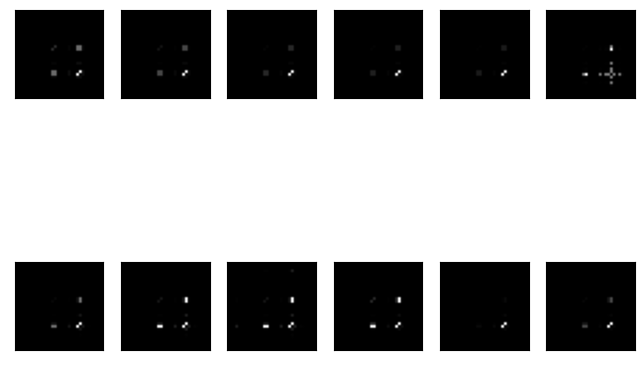

In [8]:
# visualize the TAM
n_data = 12
row = 2
col = 6
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(8,6))

for i, img in enumerate(tam[:n_data]):
    _r = i // col
    _c = i % col
    ax[_r,_c].axes.xaxis.set_visible(False) 
    ax[_r,_c].axes.yaxis.set_visible(False)
    ax[_r,_c].imshow(tam[i], cmap='gray') # 画像を表示